TASK 1 - CLASSIFICATION OF IRIS FLOWERS


Author - Vidnyani Umathe


Date - 02/02/2022


Aim - To visualize the dataset and check the accuracy of the model using various classifiers.

Import Libraries

In [70]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset

In [71]:
df = pd.read_csv(r'iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


Analyzing  Data

In [72]:
#Statistical Summary 
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [73]:

df.shape

(150, 5)

Checking missing values

In [74]:
df.isnull()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [75]:
df = df.replace(r'^\s*$', np.nan, regex=True)

Data Visualization

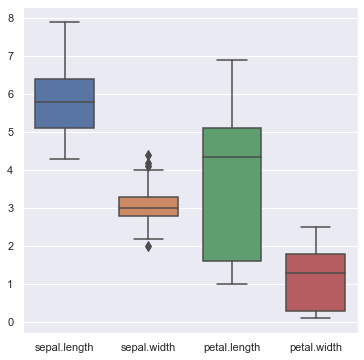

In [76]:
#boxplot
sns.boxplot(data = df, width= 0.7, fliersize = 7)
sns.set(rc = {"figure.figsize" :(6,6)})

array([[<AxesSubplot:title={'center':'sepal.length'}>,
        <AxesSubplot:title={'center':'sepal.width'}>],
       [<AxesSubplot:title={'center':'petal.length'}>,
        <AxesSubplot:title={'center':'petal.width'}>]], dtype=object)

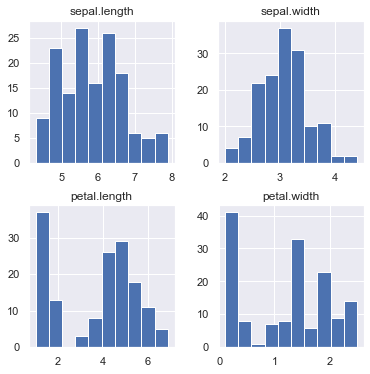

In [77]:
#histogram
df.hist()

<AxesSubplot:>

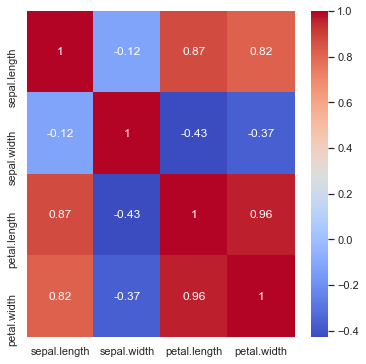

In [78]:
#heatmap (to determine the correlation between column values)
corr = df.corr()
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

Train and Test the dataset

In [80]:
#Splitting our dataset to train and test the model
from sklearn.model_selection import train_test_split
X = df.drop(columns=['variety'])
Y = df['variety']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

Support Vector Classifier

In [89]:
#Using Support Vector
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)
#finding accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred_svc)

0.9333333333333333

kNN Classifier

In [87]:
#using kNN with the splitted data
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier(n_neighbors=6,metric='minkowski',p=2) #nearest the neighbor bigger the accuracy 
kNN.fit(x_train,y_train)
predicted=kNN.predict(x_test) 
#finding accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predicted)

0.8666666666666667

Decision Tree Classifier

In [86]:
#using decision  tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier()#calling dt classifier
dt.fit(x_train,y_train)#fitting  train dataset
predict_dt = dt.predict(x_test)
accuracy_score(y_test,predict_dt) 

0.8666666666666667

Naive Bayes Classifier

In [88]:
#using naive bayes classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
NB=GaussianNB()
NB.fit(x_train,y_train)
pred_NB = NB.predict(x_test)
accuracy_score(y_test,pred_NB) 

0.8333333333333334

In [93]:
results = pd.DataFrame({
    'Model': ['Support Vector','KNN' ,'Decision Tree', 'Naive Bayes'],
    'Score': [0.93,0.86,0.86,0.83]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.93,Support Vector
0.86,KNN
0.86,Decision Tree
0.83,Naive Bayes


CONCLUSION

Here SVC is having the highest accuracy so we can use support vector classifier for predictions.